<a href="https://colab.research.google.com/github/raymondlo84/OpenVINO-demos/blob/main/OpenVINO_Full_Setup%2BTensorFlow_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install OpenVINO

##Download and Install OpenVINO Toolkit

In [34]:
!sudo apt-get install -y pciutils cpio
!sudo apt autoremove
#Download the 2021.1 from Intel's Official Website
!wget https://registrationcenter-download.intel.com/akdlm/irc_nas/17062/l_openvino_toolkit_p_2021.1.110.tgz -O l_openvino_toolkit_p_2021.1.110.tgz
path = "l_openvino_toolkit_p_2021.1.110.tgz"
## install OpenVINO with command line mode
!tar xzf "{path}" && \
    cd l_openvino_toolkit_p_2021.1.110 && \
    ./install_openvino_dependencies.sh && \
    sed -i 's/decline/accept/g' silent.cfg && \
    ./install.sh --silent silent.cfg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cpio is already the newest version (2.12+dfsg-6ubuntu0.18.04.1).
pciutils is already the newest version (1:3.5.2-1ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 60 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 60 not upgraded.
--2020-11-23 21:47:18--  https://registrationcenter-download.intel.com/akdlm/irc_nas/17062/l_openvino_toolkit_p_2021.1.110.tgz
Resolving registrationcenter-download.intel.com (registrationcenter-download.intel.com)... 23.193.24.6
Connecting to registrationcenter-download.intel.com (registrationcenter-download.intel.com)|23.193.24.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492269219 (469M) [application/x-compressed]
Saving to: ‘l_openvino_toolkit_p_2021.1.110.tgz’

l_openvino_toolkit_ 100%[===================>] 469.4

##Install Dependencies and Prerequisites


In [33]:
## install dependencies
!/opt/intel/openvino_2021/install_dependencies/install_openvino_dependencies.sh
## install prerequisites (with Tensorflow 2.x)
!/opt/intel/openvino_2021/deployment_tools/model_optimizer/install_prerequisites/install_prerequisites.sh tf2


This script installs the following OpenVINO 3rd-party dependencies:
  1. GTK+, FFmpeg and GStreamer libraries used by OpenCV
  2. libusb library required for Myriad plugin for Inference Engine
  3. build dependencies for OpenVINO samples
  4. build dependencies for GStreamer Plugins

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updat

## Run Validation Demo

In [32]:
#Run the Validation Demo code.
demo_cmd = "/opt/intel/openvino_2021/deployment_tools/demo/demo_squeezenet_download_convert_run.sh"
import os
import subprocess
import shutil
output = subprocess.check_output(demo_cmd, shell=True)
print (output.decode('utf-8'))     

target_precision = FP16
[setupvars.sh] OpenVINO environment initialized


###################################################



Installing dependencies
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bi

# OpenVINO Tensorflow Demos

## Tensorflow InceptionV3 (Image Classification) 

###Import the Tensorflow Library and InceptionV3

In [31]:
import os
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3

import shutil
import subprocess

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.1)


###Download the InceptionV3 (imagenet) Model

In [ ]:
print("Downloading the model....")
model = InceptionV3(weights='imagenet')
model_fname = './inceptionv3/'

# Save the model to path specified.
if os.path.isdir(model_fname):
    print(f"{model_fname} exists already. Deleting the folder")
    shutil.rmtree(model_fname)
os.mkdir(model_fname)

# Save the model
print("\nSaving the model in Tensorflow SavedModel Format ...")
model.save(model_fname)
print(f"Model saved at {model_fname}")

96116736/96112376 [==============================] - 6s 0us/step

Saving the model in Tensorflow SavedModel Format ...
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./inceptionv3/assets
Model saved at ./inceptionv3/


### Convert the Model to IR

In [ ]:
source_cmd= "/opt/intel/openvino_2021/bin/setupvars.sh"

# Setup model optimizer command ...
ir_name = "inceptionv3"
ir_data_type = "FP32"
ir_out_dir = f"{model_fname}/IR_models/{ir_data_type}"
ir_input_shape = "[1,299,299,3]"

mo_cmd = f"/opt/intel/openvino_2021/deployment_tools/model_optimizer/mo_tf.py \
      --saved_model_dir {model_fname} \
      --input_shape {ir_input_shape} \
      --data_type {ir_data_type} \
      --output_dir {ir_out_dir}  \
      --model_name {ir_name}"
print ("Running model optimizer to convert model to OpenVINO IR format ....")
print("\n--".join(mo_cmd.split("--")))


output = subprocess.check_output(source_cmd+" && "+mo_cmd, shell=True)
print (output.decode('utf-8'))     

###Define Preprocessing Function

In [ ]:
#install pre-req
!pip install pillow numpy -q

from PIL import Image
import numpy as np

def pre_process_image(imagePath, img_height=299):
    # Model input format
    n, c, h, w = [1, 3, img_height, img_height]
    image = Image.open(imagePath)
    image = image.resize((h, w), resample=Image.BILINEAR)

    # Normalize to keep data between 0 - 1
    image = np.array(image) / 255.0

    # Change data layout from HWC to CHW
    image = image.transpose((2, 0, 1))
    input_image = image.reshape((n, c, h, w))

    return input_image

### Download, Load and Pre-process the Input Image

---




In [28]:
inp_img_url = "https://upload.wikimedia.org/wikipedia/commons/3/33/GoldenRetrieverSnow.jpg"
inp_file_name = 'dog-image.jpg'

#Download the image from wikipedia
output = subprocess.check_output(f"curl {inp_img_url} --output {inp_file_name}", shell=True)

#Pre-process the image and get it ready for inference.
input_image = pre_process_image(inp_file_name)

### Load the OpenVINO IR network and Run the Inference

In [29]:
from openvino.inference_engine import IECore

model_xml = f'{ir_out_dir}/{ir_name}.xml'
model_bin = f'{ir_out_dir}/{ir_name}.bin'

# Load network to the plugin
ie = IECore()
net = ie.read_network(model=model_xml, weights=model_bin)
exec_net = ie.load_network(network=net, device_name="CPU")
del net

input_layer = next(iter(exec_net.input_info))
output_layer = next(iter(exec_net.outputs))

# Run the Inference on the Input image...
res = exec_net.infer(inputs={input_layer: input_image})
res = res[output_layer]

### Process and Display the Results

Top 3 Predictions:
golden_retriever: 95.70 %
Labrador_retriever: 1.40 %
kuvasz: 0.58 %
Prediction: golden_retriever: 95.70 %


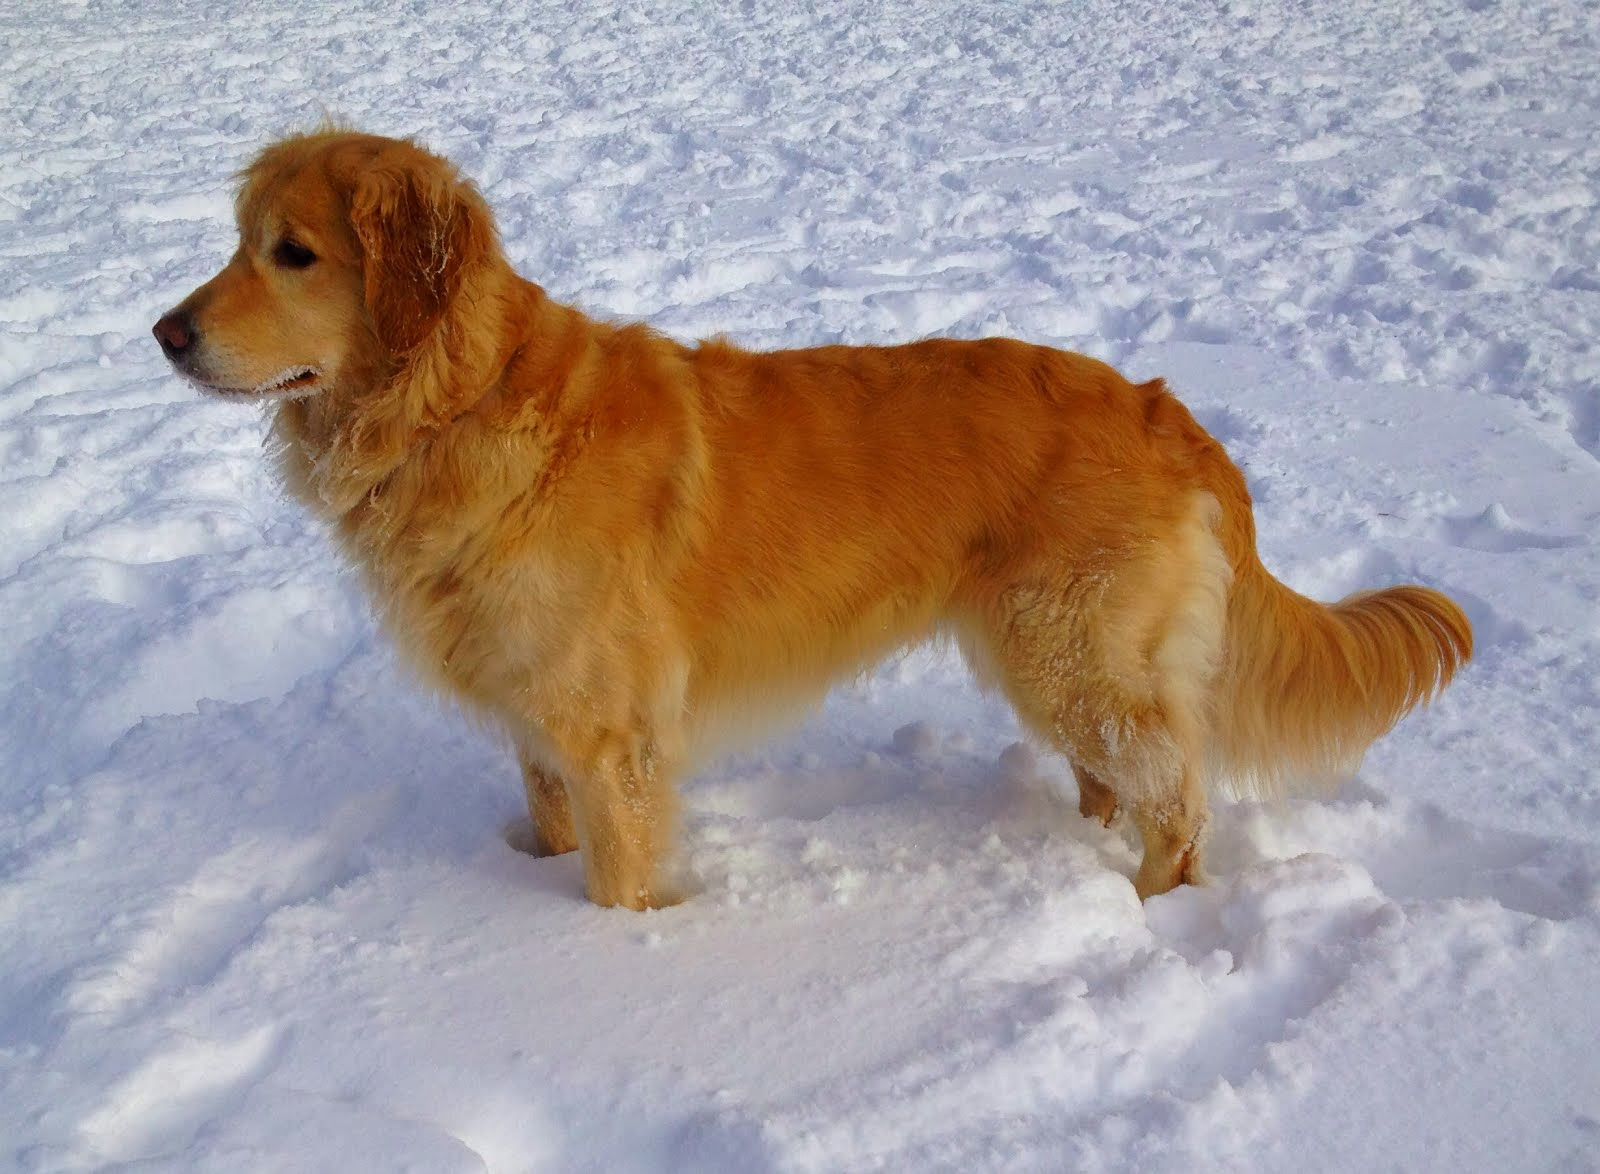

In [30]:
from tensorflow.keras.applications.inception_v3 import decode_predictions
# Predicted class index.
idx = np.argsort(res[0])[-1]
top3_pred = decode_predictions(res, top=3)[0]

print('Top 3 Predictions:')
for pred in top3_pred:
    print(f"{pred[1]}: {pred[2]*100 :.2f} %")
    
#Display the result on screen
from IPython.display import display 
pred_class = top3_pred[0][1]
pred_prob = top3_pred[0][2]
print(f"Prediction: {pred_class}: {pred_prob*100:.2f} %")
display(Image.open(inp_file_name))

# Tensorflow Comparison

## Download, Load, and Preprocess, and Run Inference the Input Image

In [35]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions

model = InceptionV3(weights='imagenet')

inp_img_url = "https://upload.wikimedia.org/wikipedia/commons/3/33/GoldenRetrieverSnow.jpg"
inp_file_name = 'dog-image.jpg'

#Download the image from wikipedia
output = subprocess.check_output(f"curl {inp_img_url} --output {inp_file_name}", shell=True)

img = image.load_img(inp_file_name, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x, mode='tf')

preds = model.predict(x)

###Display Results

Top 3 Predictions:
golden_retriever: 89.59 %
Labrador_retriever: 1.65 %
kuvasz: 1.03 %
Prediction: golden_retriever: 89.59 %


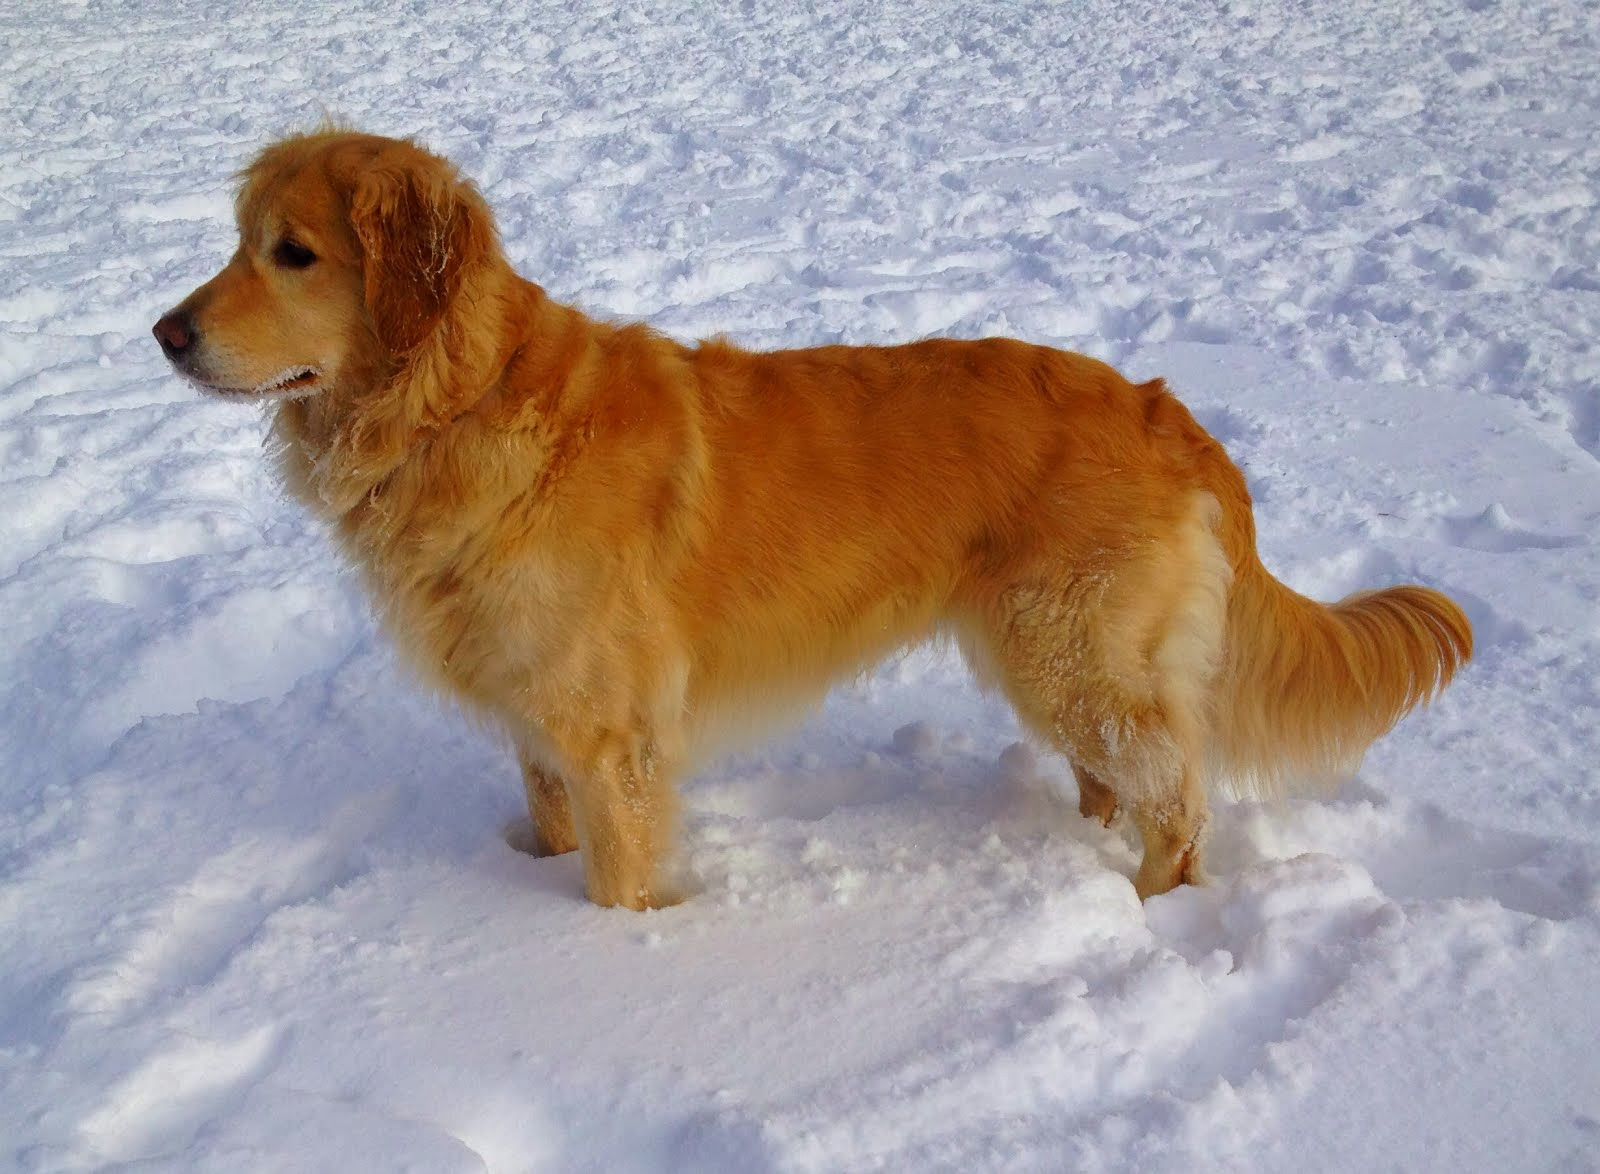

In [36]:
from tensorflow.keras.applications.inception_v3 import decode_predictions
# Predicted class index.
idx = np.argsort(preds[0])[-1]
top3_pred = decode_predictions(preds, top=3)[0]

print('Top 3 Predictions:')
for pred in top3_pred:
    print(f"{pred[1]}: {pred[2]*100 :.2f} %")

from IPython.display import display 
pred_class = top3_pred[0][1]
pred_prob = top3_pred[0][2]
print(f"Prediction: {pred_class}: {pred_prob*100:.2f} %")
display(Image.open(inp_file_name))